# Определение перспективного тарифа для телеком компании

### Описание проекта:
Телеком-компания разрабатывает 2 тарифных плана.  
Цель: выяснить, какой из тарифов приносит больше выручки.   
Описание данных: история пользования обоими тарифами 500 пользователями за 2018 год.    

**Описание тарифов**
  
*Тариф «Смарт»*  
Ежемесячная плата: 550 рублей  
Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
минута разговора: 3 рубля  
сообщение: 3 рубля  
1 Гб интернет-трафика: 200 рублей  

*Тариф «Ультра»*
Ежемесячная плата: 1950 рублей  
Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика  
Стоимость услуг сверх тарифного пакета:  
минута разговора: 1 рубль  
сообщение: 1 рубль  
1 Гб интернет-трафика: 150 рублей  
*Примечание:* 
«Мегалайн» всегда округляет секунды до минут, а мегабайты — до гигабайт. Каждый звонок округляется отдельно: даже если он длился всего 1 секунду, будет засчитан как 1 минута.
Для веб-трафика отдельные сессии не считаются. Вместо этого общая сумма за месяц округляется в бо́льшую сторону. Если абонент использует 1025 мегабайт в этом месяце, с него возьмут плату за 2 гигабайта

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
from scipy import stats as st
import math 
warnings.filterwarnings('ignore')

In [3]:
internet = pd.read_csv('/Users/alexey_zalesov/Desktop/ya_prakrikum/ds/datasets/internet.csv', sep=',', index_col=0)
calls = pd.read_csv('/Users/alexey_zalesov/Desktop/ya_prakrikum/ds/datasets/calls.csv', sep=',')
messages = pd.read_csv('/Users/alexey_zalesov/Desktop/ya_prakrikum/ds/datasets/messages.csv', sep=',')
users = pd.read_csv('/Users/alexey_zalesov/Desktop/ya_prakrikum/ds/datasets/users.csv', sep=',')
tariffs = pd.read_csv('/Users/alexey_zalesov/Desktop/ya_prakrikum/ds/datasets/tariffs.csv', sep=',')



display(users.head())
print(users.describe())

display(internet.head())
print(internet.describe())

display(calls.head())
print(calls.describe())

display(messages.head())
print(messages.describe())

display(tariffs.head())
print(tariffs.describe())



,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


           user_id        age
count   500.000000  500.00000
mean   1249.500000   46.58800
std     144.481833   16.66763
min    1000.000000   18.00000
25%    1124.750000   32.00000
50%    1249.500000   46.00000
75%    1374.250000   62.00000
max    1499.000000   75.00000


,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


             mb_used        user_id
count  149396.000000  149396.000000
mean      370.192426    1252.099842
std       278.300951     144.050823
min         0.000000    1000.000000
25%       138.187500    1130.000000
50%       348.015000    1251.000000
75%       559.552500    1380.000000
max      1724.830000    1499.000000


,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


            duration        user_id
count  202607.000000  202607.000000
mean        6.755887    1253.940619
std         5.843365     144.722751
min         0.000000    1000.000000
25%         1.300000    1126.000000
50%         6.000000    1260.000000
75%        10.700000    1379.000000
max        38.000000    1499.000000


,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


             user_id
count  123036.000000
mean     1256.989410
std       143.523967
min      1000.000000
25%      1134.000000
50%      1271.000000
75%      1381.000000
max      1499.000000


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


       messages_included  mb_per_month_included  minutes_included  \
count           2.000000               2.000000          2.000000   
mean          525.000000           23040.000000       1750.000000   
std           671.751442           10861.160159       1767.766953   
min            50.000000           15360.000000        500.000000   
25%           287.500000           19200.000000       1125.000000   
50%           525.000000           23040.000000       1750.000000   
75%           762.500000           26880.000000       2375.000000   
max          1000.000000           30720.000000       3000.000000   

       rub_monthly_fee  rub_per_gb  rub_per_message  rub_per_minute  
count         2.000000    2.000000         2.000000        2.000000  
mean       1250.000000  175.000000         2.000000        2.000000  
std         989.949494   35.355339         1.414214        1.414214  
min         550.000000  150.000000         1.000000        1.000000  
25%         900.000000  162.

## Подготавливаем данные:
Для этого:
* 		Приведим данные к нужным типам;
* 		Чистим данные (в данных есть звонки с нулевой продолжительностью. Это не ошибка: нулями обозначены пропущенные звонки, поэтому их не нужно удалять)


In [21]:
tariffs.set_axis(['messages_included', 'mb_per_month_included', 'minutes_included', 'rub_monthly_fee', 'rub_per_gb',
                 'rub_per_message', 'rub_per_minute', 'tariff'],
                  axis='columns', inplace=True )

calls['duration'] = np.ceil(calls['duration'])



display(internet.head())





print(internet['mb_used'].value_counts().head())
print(internet['mb_used'].value_counts().head(1), 'Количество пропусков в столбце "mb_used"')


#internet =  internet.drop(columns = 'Unnamed: 0')
#удалили пустой столбец - дублировал номер строк - скорее всего, ошибка выгрузки



display(internet.head())


,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


0.00      19598
197.56        9
447.30        9
335.91        9
108.95        8
Name: mb_used, dtype: int64
0.0    19598
Name: mb_used, dtype: int64 Количество пропусков в столбце "mb_used"


,id,mb_used,session_date,user_id,month
0,1000_0,112.95,2018-11-25,1000,11
1,1000_1,1052.81,2018-09-07,1000,9
2,1000_2,1197.26,2018-06-25,1000,6
3,1000_3,550.27,2018-08-22,1000,8
4,1000_4,302.56,2018-09-24,1000,9


19598 нулевых значений в столбце 'mb_used' таблицы "internet". Возможно, это те дни, когда пользователь по какой-либо причине не пользовался интернетом, но при выгрузке данных был поставлен "0" как со звонками. Их почти 1/7 от общих данных, предалагаю их просто оставить. 

In [5]:
#print(internet['mb_used'].isna().sum())

                        
calls['month'] = pd.DatetimeIndex(calls['call_date']).month

internet['month'] = pd.DatetimeIndex(internet['session_date']).month

messages['month'] = pd.DatetimeIndex(messages['message_date']).month

call_count = calls.pivot_table(index = ['user_id', 'month'] , values = 'duration', aggfunc ='count').reset_index()
display(call_count.head(15))
#количество звонков по месяцам каждого пользователя 



,user_id,month,duration
0,1000,5,22
1,1000,6,43
2,1000,7,47
3,1000,8,52
4,1000,9,58
5,1000,10,57
6,1000,11,43
7,1000,12,46
8,1001,11,59
9,1001,12,63


In [6]:

call_sum = calls.pivot_table(index = ['user_id', 'month'] , values = 'duration', aggfunc ='sum').reset_index()
#display(call_sum.head(15))
#суммарное количество минут по месяцам каждого пользователя 

messages_count = messages.pivot_table(index = ['user_id', 'month'], values='id', aggfunc = 'count').reset_index()
#количество отправленных сообщений каждым пользователем по месяцам

internet_trafic = internet.pivot_table(index=['user_id','month'], values='mb_used', aggfunc='sum').reset_index()
#количество трафика по каждому абоненту по месяцам 
#print(internet_trafic)

total_pivot = call_count.merge(call_sum, on=('user_id', 'month') ,  how='outer').merge(
    messages_count, how='outer', on=('user_id','month')).merge(internet_trafic, how='outer',on=('user_id','month'))



total_pivot.set_axis(['user_id', 'month', 'calls_count', 'calls_duration', 'messages_count', 'mb_used' ] 
                     ,axis='columns', inplace=True )


In [7]:

#total_pivot = total_pivot.dropna(subset =['calls_count', 'calls_duration', 'messages_count'])
#раньше отбрасывал значения, теперь заменяю их нулями. 


total_pivot= total_pivot.fillna(0)
#раньше отбрасывал значения, теперь заменяю их нулями. 


users_for_tab = users[['user_id', 'tariff']]


total_pivot = total_pivot.merge(users_for_tab, how='outer', on = 'user_id' ).reset_index()

## проверяем количество мегабайт

print(total_pivot['mb_used'].sum(), 'Количество мегабайт в итоговой таблице')
print(internet['mb_used'].sum(), 'Количество мегабайт в первоначальной таблице')
print('Все верно')



total_pivot =  total_pivot.drop(columns = 'index')

total_pivot['gb_used'] = total_pivot['mb_used']/1024

total_pivot['gb_used'] = np.ceil(total_pivot['gb_used'])


#display(total_pivot.head(50))
#проверка значений - NaN заменились на 0





55305267.73 Количество мегабайт в итоговой таблице
55305267.73 Количество мегабайт в первоначальной таблице
Все верно


In [8]:
total_pivot = total_pivot.merge(tariffs ,on = 'tariff', how='outer').reset_index()

total_pivot.info()

#display(total_pivot.head())
print()
print(total_pivot['user_id'].nunique(), 'Количество идентификаторов пользователей в итоговой таблице')
#total_user_id = calls['user_id'].count()+internet[user_id].count()+
print(users['user_id'].nunique(), 'Количество идентификаторов пользователей в первоначальной таблице')
print('Все верно')
display(calls.head())

print(total_pivot['messages_count'].sum(), 'Количество сообщений в итоговой таблице')
print(messages['id'].count(), 'Количество идентификаторов сообщений в таблице "Messages"')
print('Все верно!\n')

print(total_pivot['calls_duration'].sum(), 'Количество сообщений в итоговой таблице')
print(calls['duration'].sum(), 'Сумма минут звонков в первоначальной таблице')
print('Все верно!')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3216 entries, 0 to 3215
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   index                  3216 non-null   int64  
 1   user_id                3216 non-null   int64  
 2   month                  3214 non-null   float64
 3   calls_count            3214 non-null   float64
 4   calls_duration         3214 non-null   float64
 5   messages_count         3214 non-null   float64
 6   mb_used                3214 non-null   float64
 7   tariff                 3216 non-null   object 
 8   gb_used                3214 non-null   float64
 9   messages_included      3216 non-null   int64  
 10  mb_per_month_included  3216 non-null   int64  
 11  minutes_included       3216 non-null   int64  
 12  rub_monthly_fee        3216 non-null   int64  
 13  rub_per_gb             3216 non-null   int64  
 14  rub_per_message        3216 non-null   int64  
 15  rub_

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0.0,1000,7
1,1000_1,2018-08-17,0.0,1000,8
2,1000_2,2018-06-11,3.0,1000,6
3,1000_3,2018-09-21,14.0,1000,9
4,1000_4,2018-12-15,6.0,1000,12


123036.0 Количество сообщений в итоговой таблице
123036 Количество идентификаторов сообщений в таблице "Messages"
Все верно!

1450301.0 Количество сообщений в итоговой таблице
1450301.0 Сумма минут звонков в первоначальной таблице
Все верно!


In [9]:
def revenue_funtion(row):
    result = 0
    result+=row['rub_monthly_fee']
    if row['messages_count'] > row['messages_included']:
        result+=(row['messages_count']-row['messages_included'])*row['rub_per_message']
    if row['gb_used'] > (row['mb_per_month_included']/1024):
        result+=((row['gb_used']-(row['mb_per_month_included']/1024))*(row['rub_per_gb']))
    if row['calls_duration']>row['minutes_included']:
        result+=((row['calls_duration'] - row['minutes_included'])*row['rub_per_minute'])
    return result

        
total_pivot['revenue_perr_month'] = total_pivot.apply(revenue_funtion, axis=1)




    
total_pivot =  total_pivot.drop(columns = 'index')
    
display(total_pivot.head(50))
    

,user_id,month,calls_count,calls_duration,messages_count,mb_used,tariff,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_perr_month
0,1000,5.0,22.0,159.0,22.0,2253.49,ultra,3.0,1000,30720,3000,1950,150,1,1,1950.0
1,1000,6.0,43.0,172.0,60.0,23233.77,ultra,23.0,1000,30720,3000,1950,150,1,1,1950.0
2,1000,7.0,47.0,340.0,75.0,14003.64,ultra,14.0,1000,30720,3000,1950,150,1,1,1950.0
3,1000,8.0,52.0,408.0,81.0,14055.93,ultra,14.0,1000,30720,3000,1950,150,1,1,1950.0
4,1000,9.0,58.0,466.0,57.0,14568.91,ultra,15.0,1000,30720,3000,1950,150,1,1,1950.0
5,1000,10.0,57.0,350.0,73.0,14702.49,ultra,15.0,1000,30720,3000,1950,150,1,1,1950.0
6,1000,11.0,43.0,338.0,58.0,14756.47,ultra,15.0,1000,30720,3000,1950,150,1,1,1950.0
7,1000,12.0,46.0,333.0,70.0,9817.61,ultra,10.0,1000,30720,3000,1950,150,1,1,1950.0
8,1003,8.0,55.0,380.0,37.0,8565.21,ultra,9.0,1000,30720,3000,1950,150,1,1,1950.0
9,1003,9.0,134.0,961.0,91.0,12468.87,ultra,13.0,1000,30720,3000,1950,150,1,1,1950.0


## Проанализируем данные
Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.


In [10]:
display(tariffs.head())

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


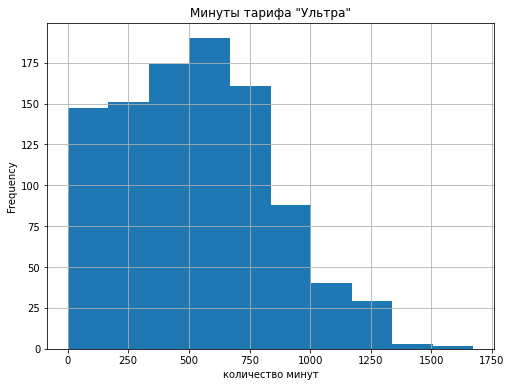

518.0 Медиана количества минут тарифа "Ультра" 

100873.63339730089 Дисперсия количества минут тарифа "Ультра" 

317.60609785912624 Стандартное отклонение минут тарифа "Ультра"


In [11]:
total_pivot.query('tariff== "ultra" ')['calls_duration'].plot(kind='hist', grid=True, figsize=(8,6),
                                                              title='Минуты тарифа "Ультра"' )
plt.xlabel('количество минут')
plt.show()

print(total_pivot.query('tariff== "ultra" ')['calls_duration'].median(), 'Медиана количества минут тарифа "Ультра" \n')

print(total_pivot.query('tariff== "ultra" ')['calls_duration'].var(), 'Дисперсия количества минут тарифа "Ультра" \n')

print(total_pivot.query('tariff== "ultra" ')['calls_duration'].std(),'Стандартное отклонение минут тарифа "Ультра"')

Датасет скошен вправо, есть крайние значения, вплоть до 1650. Соответственно, медиана меньше среднего. Нет пользователей, которые превышают лимит по минутам в месяц. Лишь малая часть использует более 1000 минут в месяц. Также высока доля тех, кто практически не пользуется телефонной свяью. Лимит можно сократить. 





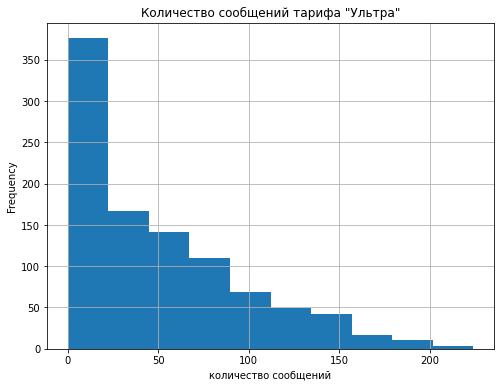

38.0 Медиана количества сообщений тарифа "Ультра" 

2285.2661425446827 Дисперсия количества сообщений  тарифа "Ультра" 

47.804457350174815 Стандартное отклонение сообщений  тарифа "Ультра"


In [12]:
total_pivot.query('tariff== "ultra" ')['messages_count'].plot(kind='hist', grid=True, figsize=(8,6), 
                                                              title='Количество сообщений тарифа "Ультра"',
                                                              )
plt.xlabel('количество сообщений')
plt.show()

print(total_pivot.query('tariff== "ultra" ')['messages_count'].median(), 'Медиана количества сообщений тарифа "Ультра" \n')

print(total_pivot.query('tariff== "ultra" ')['messages_count'].var(), 'Дисперсия количества сообщений  тарифа "Ультра" \n')

print(total_pivot.query('tariff== "ultra" ')['messages_count'].std(),'Стандартное отклонение сообщений  тарифа "Ультра"')



Никто из абонентов не превышает предоставленный лимит. Также видно, что пользователи пользуются смс-сообщениями не так активно, как звонками или интернетом. Большинство не отправляет более 100 сообщений в месяц. Скорее всего, лимит можно сократить. 





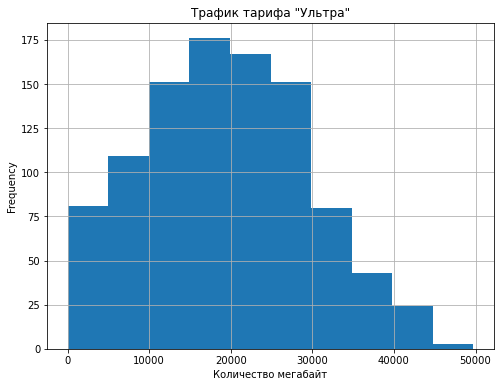

19308.01 Медиана трафика тарифа "Ультра" 

101751013.78335372 Дисперсия трафика тарифа "Ультра" 

10087.170752166026 Стандартное отклонение трафика тарифа "Ультра"


In [13]:
total_pivot.query('tariff== "ultra" ')['mb_used'].plot(kind='hist', grid=True, figsize=(8,6),
                                                       title='Трафик тарифа "Ультра"')


plt.xlabel('Количество мегабайт')
plt.show()

print(total_pivot.query('tariff== "ultra" ')['mb_used'].median(), 'Медиана трафика тарифа "Ультра" \n')

print(total_pivot.query('tariff== "ultra" ')['mb_used'].var(), 'Дисперсия трафика тарифа "Ультра" \n')

print(total_pivot.query('tariff== "ultra" ')['mb_used'].std(),'Стандартное отклонение трафика тарифа "Ультра"')





Датасет смещен влево. Есть значения, превышающие установленный лимит (30720). Самый часто встречающийся промежуток - [15,000 - 20000] мегабайт. 





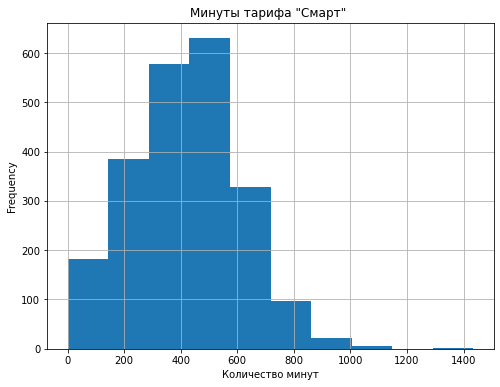

422.0 Медиана количества минут тарифа "Смарт" 

36219.315784344246 Дисперсия количества минут тарифа "Смарт" 

190.3137298892128 Стандартное отклонение минут тарифа "Смарт"


In [14]:
total_pivot.query('tariff== "smart" ')['calls_duration'].plot(kind='hist', grid=True, figsize=(8,6)
                                                              , title='Минуты тарифа "Смарт" ',
                                                             )


plt.xlabel('Количество минут')
plt.show()

print(total_pivot.query('tariff== "smart" ')['calls_duration'].median(), 'Медиана количества минут тарифа "Смарт" \n')

print(total_pivot.query('tariff== "smart" ')['calls_duration'].var(), 'Дисперсия количества минут тарифа "Смарт" \n')

print(total_pivot.query('tariff== "smart" ')['calls_duration'].std(),'Стандартное отклонение минут тарифа "Смарт"')

График смещен вправо, установленный лимит в 500 минут часто превышается. Есть выбросы (1300-1430).

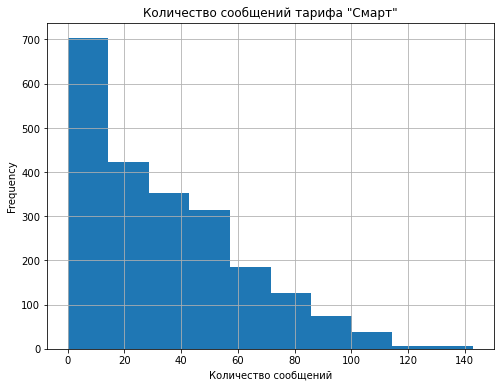

28.0 Медиана количества сообщений тарифа "Смарт" 

796.8129584480083 Дисперсия количества сообщений  тарифа "Смарт" 

28.22787555676141 Стандартное отклонение сообщений  тарифа "Смарт"


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [15]:
total_pivot.query('tariff== "smart" ')['messages_count'].plot(kind='hist', grid=True, 
                                                              figsize=(8,6),
                                                              title='Количество сообщений тарифа "Смарт"',
                                                            )

plt.xlabel('Количество сообщений')

plt.show()

print(total_pivot.query('tariff== "smart" ')['messages_count'].median(), 'Медиана количества сообщений тарифа "Смарт" \n')

print(total_pivot.query('tariff== "smart" ')['messages_count'].var(), 'Дисперсия количества сообщений  тарифа "Смарт" \n')

print(total_pivot.query('tariff== "smart" ')['messages_count'].std(),'Стандартное отклонение сообщений  тарифа "Смарт"')


display(tariffs.head())

Установленный лимит в 50 сообщений часто нарушается, пользователям его не хватает. Также много тех, кто вообще не пользуется сообщениями или пользуется ими мало. 

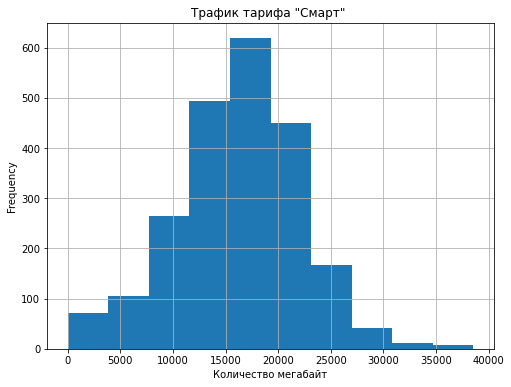

16506.84 Медиана трафика тарифа "Смарт" 

34462496.462742396 Дисперсия трафика тарифа "Смарт" 

5870.476681049197 Стандартное отклонение трафика тарифа "Смарт"


In [16]:
total_pivot.query('tariff== "smart" ')['mb_used'].plot(kind='hist', grid=True, figsize=(8,6),
                                                       title='Трафик тарифа "Смарт" ')

plt.xlabel('Количество мегабайт')

plt.show()

print(total_pivot.query('tariff== "smart" ')['mb_used'].median(), 'Медиана трафика тарифа "Смарт" \n')

print(total_pivot.query('tariff== "smart" ')['mb_used'].var(), 'Дисперсия трафика тарифа "Смарт" \n')

print(total_pivot.query('tariff== "smart" ')['mb_used'].std(),'Стандартное отклонение трафика тарифа "Смарт"')






Установленный лимит (15360) меньше медианы (16462). Распределение похоже на нормальное, со смещением вправо.  

### Вывод по тарифам
Основная разница между тарифами в том, что пользователи тарифа "Смарт" платят фиксированную помесячную сумму меньше пользователей тарифа "Ультра", но при этом значительная часть из них не укладывается в предоставленный месячный лимит и оплачивает сверх него дополнительные минуты/сообщения/трафик интернета за более высокую цену, чем пользователи тарифа "Ультра". Из общего - среди пользователей обоих тарифов много тех, кто совершает мало звонков или отправляет мало сообщений. Также интернетом активно пользуются многие пользователи обоих тарифов. 


##  Проверяем гипотезы
### Cредняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
Предлагаю считать за гипотезу H0, "Среднее двух генеральных совокупностей выручек пользователей каждого из тарифа ("Ультра" и "Смарт") равны". За альтернативную гипотезу H1 предлагаю выдвинуть "Среднее двух генеральных совокупностей выручек пользователей каждого из тарифа ("Ультра" и "Смарт") различаются".
Как критерий предлагаю использовать метод stats.ttest_ind(args), который вернет вероятность того, что среднее Генеральных совокупностей выручек пользователей тарифа "Смарт" и "Ультра" совпадает, используя предоставленные выборки. 
Предлагаю поставить значение доверительного интервала в 5%

In [17]:
print(total_pivot.query('tariff == "ultra" ' )['revenue_perr_month'].var(), 'Дисперсия помесячной выручки пользователей тарифа "Ультра"')
print(total_pivot.query('tariff == "smart" ' )['revenue_perr_month'].var(), 'Дисперсия помесячной выручки пользователей тарифа "Смарт"')
print('Дисперсии не совпали \n')

print(total_pivot.query('tariff == "ultra" ' )['revenue_perr_month'].mean(), 'Среднее помесячной выручки пользователей тарифа "Ультра"')
print(total_pivot.query('tariff == "smart" ' )['revenue_perr_month'].mean(), 'Среднее помесячной выручки пользователей тарифа "Смарт"')






sample_ultra_revenue = total_pivot.query('tariff == "ultra" ')['revenue_perr_month']
sample_smart_revenue = total_pivot.query('tariff == "smart" ')['revenue_perr_month']

results = st.ttest_ind(sample_ultra_revenue, sample_smart_revenue, equal_var=False)


#добавил альфа

alpha=0.05

print('p-значение', results.pvalue)

if results.pvalue<alpha:
    print("Отвергаем H0")
else:
    print("Не получилось отвергнуть гипотезу H0")



141387.71480935952 Дисперсия помесячной выручки пользователей тарифа "Ультра"
669730.7638948115 Дисперсия помесячной выручки пользователей тарифа "Смарт"
Дисперсии не совпали 

2070.030425963489 Среднее помесячной выручки пользователей тарифа "Ультра"
1289.6417040358745 Среднее помесячной выручки пользователей тарифа "Смарт"
p-значение 1.927011394420941e-250
Отвергаем H0


P-значение очень маленькое, вероятность того, что среднее двух выборок совпадает ничтожно мала. Предлагаю считать гипотезу H0 о равенстве средних ГС выручек пользователей тарифов "Ультра" и "Смарт" отвергнутой и принять альтернативную гипотезу H1, о различии средних двух генеральных совокупностей выручек пользователей каждого из тарифа ("Ультра" и "Смарт").


### Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Предлагаю взять за нулевую гипотезу H0 "Средняя выручка пользователей из Москвы не отличается(равна) выручке пользователей из других регионов". За альтернативную гипотезу H1 предлагаю взять "Средняя выручка пользователей из Москвы не равна средней выручке пользователей из других регионов".
Как критерий предлагаю использовать метод stats.ttest_ind(args), который вернет вероятность того, что среднее Генеральных совокупностей пользователей из Москвы и не из Москвы совпадает, используя предоставленные выборки. 

Предлагаю поставить значение альфа в 5%.

In [18]:
total_pivot_with_cities = total_pivot.merge(users, on='user_id', how='left')
total_pivot_with_cities =  total_pivot_with_cities.drop(columns = ['first_name', 'last_name', 'reg_date', 'tariff_y', 'churn_date', 'age'])
display(total_pivot_with_cities.head())

#добавили столбец city к общей таблице


,user_id,month,calls_count,calls_duration,messages_count,mb_used,tariff_x,gb_used,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,revenue_perr_month,city
0,1000,5.0,22.0,159.0,22.0,2253.49,ultra,3.0,1000,30720,3000,1950,150,1,1,1950.0,Краснодар
1,1000,6.0,43.0,172.0,60.0,23233.77,ultra,23.0,1000,30720,3000,1950,150,1,1,1950.0,Краснодар
2,1000,7.0,47.0,340.0,75.0,14003.64,ultra,14.0,1000,30720,3000,1950,150,1,1,1950.0,Краснодар
3,1000,8.0,52.0,408.0,81.0,14055.93,ultra,14.0,1000,30720,3000,1950,150,1,1,1950.0,Краснодар
4,1000,9.0,58.0,466.0,57.0,14568.91,ultra,15.0,1000,30720,3000,1950,150,1,1,1950.0,Краснодар


In [19]:
print(total_pivot_with_cities.query('city == "Москва" ' )['revenue_perr_month'].var(), 'Дисперсия помесячной выручки пользователей из Москвы')
print(total_pivot_with_cities.query('city != "Москва" ' )['revenue_perr_month'].var(), 'Дисперсия помесячной выручки пользователей НЕ из Москвы')
#проверяем дисперсии выручек - вдруг они совпадают. 

sample_moscow_revenue = total_pivot_with_cities.query('city == "Москва"')['revenue_perr_month']
sample_other_city_revenue = total_pivot_with_cities.query('city != "Москва" ')['revenue_perr_month']
print("Дисперсии не равны \n")

print(total_pivot_with_cities.query('city == "Москва" ' )['revenue_perr_month'].mean(), 'Среднее помесячной выручки пользователей из Москвы')
print(total_pivot_with_cities.query('city != "Москва" ' )['revenue_perr_month'].mean(), 'Среднее помесячной выручки пользователей НЕ из Москвы')



results = st.ttest_ind(sample_moscow_revenue, sample_other_city_revenue, equal_var=False)

#добавил альфа


alpha=0.05

print('p-значение', results.pvalue)

if results.pvalue<alpha:
    print("Отвергаем H0")
else:
    print("Не получилось отвергнуть гипотезу H0")





565636.4670118879 Дисперсия помесячной выручки пользователей из Москвы
654069.574962777 Дисперсия помесячной выручки пользователей НЕ из Москвы
Дисперсии не равны 

1546.7135842880523 Среднее помесячной выручки пользователей из Москвы
1524.7251439539348 Среднее помесячной выручки пользователей НЕ из Москвы
p-значение 0.5216952110000278
Не получилось отвергнуть гипотезу H0


 Так как p-значение более 5%, то отвегнуть гипотезу H0 о равенстве средних выручек пользователей из Москвы и не из Москвы не получилось. И, соответственно, первоначальная гипотеза об отличии средней выручки пользователей из Москвы от средней выручки пользователей не из Москвы НЕ верна.

##  Общий вывод


Данные рассмотрены, очищены, создана общая сводная таблица, произведены запрошенные расчеты. Постороены гистограмы соответствующих распределений, прокомментировано поведение пользователей, проверены две гипотезы. 



In [20]:
print(total_pivot.query('tariff == "ultra" ' )['revenue_perr_month'].median(), 'Медиана помесячной выручки пользователей тарифа "Ультра"')
print(total_pivot.query('tariff == "smart" ' )['revenue_perr_month'].median(), 'Медиана помесячной выручки пользователей тарифа "Смарт"')

1950.0 Медиана помесячной выручки пользователей тарифа "Ультра"
1021.0 Медиана помесячной выручки пользователей тарифа "Смарт"


Медиана выручки пользователей тарифа "Ультра" почти в 2 раза больше медианы выручки пользователей тарифа "Смарт". Также исходя из гистограм видно, что несмотря на то что пользователи тарифа "Смарт" часто не укладываются в бесплатный лимит и оплачивают дополнительный минуты/сообщения/трафик, в отличие от пользователей тарифа "Ультра" , которые обычно укладываются в лимит, тариф "Ультра" все равно выглядит более предпочтительным для компании, благодаря высокой месячной плате, которая почти в 4 раза больше, чем у тарифа "Смарт"
Исходя из этого, можно заключить, что тариф "Ультра" предпочтительней для компании.      